<a href="https://colab.research.google.com/github/ranitha84/tensorflow-practice/blob/main/Cifar_10_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 30

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


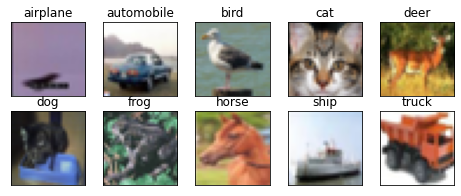

In [4]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [6]:
# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Experimemt 1
  ### Without Batch Normalization

In [7]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])




In [10]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 2.1862 - accuracy: 0.1778 - val_loss: 2.0404 - val_accuracy: 0.2607
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8095 - accuracy: 0.3461 - val_loss: 1.5526 - val_accuracy: 0.4358
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6089 - accuracy: 0.4100 - val_loss: 1.4394 - val_accuracy: 0.4766
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4728 - accuracy: 0.4655 - val_loss: 1.3643 - val_accuracy: 0.5090
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3735 - accuracy: 0.5027 - val_loss: 1.3642 - val_accuracy: 0.4975
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3016 - accuracy: 0.5356 - val_loss: 1.1639 - val_accuracy: 0.5886
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2271 - accuracy: 0.5616 - val_loss: 1.1309 - val_accuracy

Result: After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.

### Experiment 2 
  - Removing Dropouts and including Batch Normalization

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)       

In [13]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8957 - accuracy: 0.3720 - val_loss: 1.3480 - val_accuracy: 0.5136
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1968 - accuracy: 0.5744 - val_loss: 1.0554 - val_accuracy: 0.6207
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9937 - accuracy: 0.6501 - val_loss: 0.8820 - val_accuracy: 0.6862
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8696 - accuracy: 0.6916 - val_loss: 0.8706 - val_accuracy: 0.6943
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7925 - accuracy: 0.7185 - val_loss: 0.7832 - val_accuracy: 0.7329
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7206 - accuracy: 0.7447 - val_loss: 0.7975 - val_accuracy: 0.7259
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6640 - accuracy: 0.7655 - val_loss: 0.7467 - val_accuracy:

*Result: The training accuracy is increasing because of BN but the difference between train accuracy and validation accuracy is low.*

### Experiment 3 
- With Both Batch Normalization and Drop **out**

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [16]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)       

In [17]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0854 - accuracy: 0.3240 - val_loss: 1.4184 - val_accuracy: 0.5034
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3938 - accuracy: 0.4964 - val_loss: 1.1582 - val_accuracy: 0.5773
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2161 - accuracy: 0.5642 - val_loss: 1.1049 - val_accuracy: 0.6124
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0939 - accuracy: 0.6118 - val_loss: 0.9631 - val_accuracy: 0.6588
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0034 - accuracy: 0.6432 - val_loss: 0.8504 - val_accuracy: 0.7008
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9249 - accuracy: 0.6747 - val_loss: 0.9028 - val_accuracy: 0.6809
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8804 - accuracy: 0.6871 - val_loss: 0.8014 - val_accuracy:

*Result: The training accuracy and Validation accuracy are almost close to each other.*

## Experiment 4 
  - With L2 regulaizer an no drop out

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [20]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)       

In [21]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 9.1420 - accuracy: 0.3756 - val_loss: 5.7263 - val_accuracy: 0.5603
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 5.0491 - accuracy: 0.5931 - val_loss: 3.4491 - val_accuracy: 0.6512
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0722 - accuracy: 0.6704 - val_loss: 2.3707 - val_accuracy: 0.6391
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0190 - accuracy: 0.7156 - val_loss: 1.5925 - val_accuracy: 0.7251
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4418 - accuracy: 0.7450 - val_loss: 1.2129 - val_accuracy: 0.7517
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1055 - accuracy: 0.7730 - val_loss: 1.0673 - val_accuracy: 0.7555
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9185 - accuracy: 0.7939 - val_loss: 1.0233 - val_accuracy:

Result : Without dropout we can see that Training accuracy is high and Validation accuracy is low

## Experiment 5 
- With L2 and Dropout

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [24]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)       

In [25]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [26]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 9.3208 - accuracy: 0.3248 - val_loss: 5.8144 - val_accuracy: 0.5242
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 5.2383 - accuracy: 0.5170 - val_loss: 3.5211 - val_accuracy: 0.6176
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.2605 - accuracy: 0.5968 - val_loss: 2.4133 - val_accuracy: 0.6300
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1831 - accuracy: 0.6496 - val_loss: 2.0818 - val_accuracy: 0.5439
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6058 - accuracy: 0.6833 - val_loss: 1.3946 - val_accuracy: 0.6843
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2714 - accuracy: 0.7135 - val_loss: 1.1753 - val_accuracy: 0.7075
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0937 - accuracy: 0.7304 - val_loss: 1.0328 - val_accuracy:

Result : With Dropout and L2 , we can see that training accuracy and valiation accuracy are close by and we can conclude that the model doesnt overfit

### Experiment 6
- Adding additional layer

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [28]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)       

In [29]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [30]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 10s 6ms/step - loss: 6.4699 - accuracy: 0.3074 - val_loss: 4.5613 - val_accuracy: 0.3705
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.7092 - accuracy: 0.5045 - val_loss: 2.6035 - val_accuracy: 0.5942
Epoch 3/30
1563/1563 [==============================] - 9s 5ms/step - loss: 2.4493 - accuracy: 0.5787 - val_loss: 1.8366 - val_accuracy: 0.6277
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7488 - accuracy: 0.6240 - val_loss: 1.4155 - val_accuracy: 0.6533
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3659 - accuracy: 0.6531 - val_loss: 1.1203 - val_accuracy: 0.6952
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1372 - accuracy: 0.6857 - val_loss: 0.9527 - val_accuracy: 0.7272
Epoch 7/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9922 - accuracy: 0.7075 - val_loss: 0.9496 - val_accuracy

Result: With additional layer as well we can see that the training and validation accuracy are similar to the previous experiment we did. Additional layer doesnt seem to add any value

## Experiment 7
 - Updating feature map

In [31]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [32]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_39 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)       

In [33]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [34]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 14s 8ms/step - loss: 9.9852 - accuracy: 0.3467 - val_loss: 6.3545 - val_accuracy: 0.5171
Epoch 2/30
1563/1563 [==============================] - 13s 8ms/step - loss: 5.5892 - accuracy: 0.5470 - val_loss: 3.7312 - val_accuracy: 0.6517
Epoch 3/30
1563/1563 [==============================] - 13s 8ms/step - loss: 3.4297 - accuracy: 0.6245 - val_loss: 2.4424 - val_accuracy: 0.6821
Epoch 4/30
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2452 - accuracy: 0.6856 - val_loss: 1.7094 - val_accuracy: 0.7216
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6152 - accuracy: 0.7192 - val_loss: 1.3179 - val_accuracy: 0.7415
Epoch 6/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2566 - accuracy: 0.7504 - val_loss: 1.2099 - val_accuracy: 0.7224
Epoch 7/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0751 - accuracy: 0.7650 - val_loss: 1.0885 - val_ac

Result: -- 